In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("census.csv")
data.drop(data.tail(42000).index, 
        inplace = True) 
print(data.shape)
list=data.select_dtypes(include=object).columns.tolist()
data.head()

(6842, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
print("*** Count Unique values in each column ***")
    # Get a series object containing the count of unique elements
    # in each column of dataframe
uniqueValues = data.nunique()
print('Count of unique values in each column :')
print(uniqueValues)
# Count unique elements in each column including NaN
uniqueValues = data.nunique(dropna=False)
print("Count Unique values in each column including NaN")
print(uniqueValues)

*** Count Unique values in each column ***
Count of unique values in each column :
age                 70
workclass            9
fnlwgt            6104
education           16
education_num       16
marital_status       7
occupation          15
relationship         6
race                 5
sex                  2
capital_gain        92
capital_loss        63
hours_per_week      79
native_country      40
income_level         2
dtype: int64
Count Unique values in each column including NaN
age                 70
workclass            9
fnlwgt            6104
education           16
education_num       16
marital_status       7
occupation          15
relationship         6
race                 5
sex                  2
capital_gain        92
capital_loss        63
hours_per_week      79
native_country      40
income_level         2
dtype: int64


In [4]:
list=data.select_dtypes(include=object).columns.tolist()
for col in list:
    data.loc[data[col]=="?", col] = np.nan

data=data.dropna()
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,23,State-gov,186634.0,12th,8,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
6838,36,Private,32958.0,Some-college,10,Separated,Adm-clerical,Other-relative,White,Female,0.0,0.0,40.0,United-States,<=50K
6839,25,Private,254746.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6840,52,Private,158746.0,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,0.0,0.0,40.0,United-States,<=50K


### applying Ordinal Encoder

In [5]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
data_enc = encoder.fit_transform(data)
data_enc=pd.DataFrame(data_enc)
data_enc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,22.0,5.0,701.0,9.0,12.0,4.0,0.0,1.0,4.0,1.0,14.0,0.0,38.0,36.0,0.0
1,33.0,4.0,772.0,9.0,12.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,12.0,36.0,0.0
2,21.0,2.0,3755.0,11.0,8.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,38.0,36.0,0.0
3,36.0,2.0,4053.0,1.0,6.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,38.0,36.0,0.0
4,11.0,2.0,5093.0,9.0,12.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,38.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6300,6.0,5.0,2990.0,2.0,7.0,4.0,3.0,1.0,4.0,1.0,0.0,0.0,38.0,36.0,0.0
6301,19.0,2.0,160.0,15.0,9.0,5.0,0.0,2.0,4.0,0.0,0.0,0.0,38.0,36.0,0.0
6302,8.0,2.0,4326.0,9.0,12.0,2.0,9.0,5.0,4.0,0.0,0.0,0.0,38.0,36.0,0.0
6303,35.0,2.0,2208.0,11.0,8.0,4.0,7.0,4.0,4.0,1.0,0.0,0.0,38.0,36.0,0.0


In [6]:
data_enc.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_level']
data_enc.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,22.0,5.0,701.0,9.0,12.0,4.0,0.0,1.0,4.0,1.0,14.0,0.0,38.0,36.0,0.0
1,33.0,4.0,772.0,9.0,12.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,12.0,36.0,0.0
2,21.0,2.0,3755.0,11.0,8.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,38.0,36.0,0.0
3,36.0,2.0,4053.0,1.0,6.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,38.0,36.0,0.0
4,11.0,2.0,5093.0,9.0,12.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,38.0,4.0,0.0


In [7]:
#print metrics function
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

In [8]:
#data_enc=data_enc.drop("fnlwgt",axis=1)
data_enc
data_enc["income_level"] 

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6300    0.0
6301    0.0
6302    0.0
6303    0.0
6304    0.0
Name: income_level, Length: 6305, dtype: float64

In [9]:
X = data_enc.drop(['income_level'], axis=1)
X_col = X.columns

y = data_enc['income_level']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_enc, y, train_size=0.8,random_state=42)

### Applying Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [11]:
print_score(model, X_train, X_test, y_train, y_test, train=True)
print_score(model, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3792
         1.0       1.00      1.00      1.00      1252

    accuracy                           1.00      5044
   macro avg       1.00      1.00      1.00      5044
weighted avg       1.00      1.00      1.00      5044


Confusion Matrix: 
 [[3792    0]
 [   0 1252]]

ROC AUC: 1.0000

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       941
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00      1261
   macro avg       1.00      1.00      1.00      1261
weighted avg       1.00      1.00      1.00      1261


Confusion Matrix: 
 [[941   0]
 [  0 320]]

ROC AUC: 1.0000



### applying KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn.fit(X_train, y_train)
print_score(knn, X_train, X_test, y_train, y_test, train=True)
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8311

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      3792
         1.0       0.74      0.49      0.59      1252

    accuracy                           0.83      5044
   macro avg       0.80      0.72      0.74      5044
weighted avg       0.82      0.83      0.82      5044


Confusion Matrix: 
 [[3582  210]
 [ 642  610]]

ROC AUC: 0.7159

Average Accuracy: 	 0.7603
Accuracy SD: 		 0.0068
Test Result:

accuracy score: 0.7692

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.86       941
         1.0       0.58      0.34      0.43       320

    accuracy                           0.77      1261
   macro avg       0.69      0.63      0.64      1261
weighted avg       0.75      0.77      0.75      1261


Confusion Matrix: 
 [[861  80]
 [211 109]]

ROC AUC: 0.6278



### applying SVM

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state = 42)
svm.fit(X_train,y_train)
print_score(svm, X_train, X_test, y_train, y_test, train=True)
print_score(svm, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.7518

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3792
         1.0       0.00      0.00      0.00      1252

    accuracy                           0.75      5044
   macro avg       0.38      0.50      0.43      5044
weighted avg       0.57      0.75      0.65      5044


Confusion Matrix: 
 [[3792    0]
 [1252    0]]

ROC AUC: 0.5000



c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average Accuracy: 	 0.7518
Accuracy SD: 		 0.0007
Test Result:

accuracy score: 0.7462

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.85       941
         1.0       0.00      0.00      0.00       320

    accuracy                           0.75      1261
   macro avg       0.37      0.50      0.43      1261
weighted avg       0.56      0.75      0.64      1261


Confusion Matrix: 
 [[941   0]
 [320   0]]

ROC AUC: 0.5000



c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Implementing Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier 
dec_tr = DecisionTreeClassifier(random_state = 42,max_depth=3, min_samples_leaf=5) 
# Performing training 
dec_tr.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [15]:
print_score(dec_tr, X_train, X_test, y_train, y_test, train=True)
print_score(dec_tr, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3792
         1.0       1.00      1.00      1.00      1252

    accuracy                           1.00      5044
   macro avg       1.00      1.00      1.00      5044
weighted avg       1.00      1.00      1.00      5044


Confusion Matrix: 
 [[3792    0]
 [   0 1252]]

ROC AUC: 1.0000

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       941
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00      1261
   macro avg       1.00      1.00      1.00      1261
weighted avg       1.00      1.00      1.00      1261


Confusion Matrix: 
 [[941   0]
 [  0 320]]

ROC AUC: 1.0000



### Implementing gini and entropy criterion

In [16]:
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth =3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
#Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

In [17]:
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
print("Results Using Gini Index:") 
    
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 
      
print("Results Using Entropy:") 

y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 

Results Using Gini Index:
Predicted values:
[0. 0. 0. ... 1. 0. 1.]
Confusion Matrix:  [[941   0]
 [  0 320]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       941
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00      1261
   macro avg       1.00      1.00      1.00      1261
weighted avg       1.00      1.00      1.00      1261

Results Using Entropy:
Predicted values:
[0. 0. 0. ... 1. 0. 1.]
Confusion Matrix:  [[941   0]
 [  0 320]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       941
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00      1261
   macro avg       1.00      1.00      1.00      1261
weighted avg       1.00      1.00      1.00      1261



### implementing random forest with 1000 decision tree

In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(X_train, y_train);

In [19]:
print_score(rf, X_train, X_test, y_train, y_test, train=True)
print_score(rf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3792
         1.0       1.00      1.00      1.00      1252

    accuracy                           1.00      5044
   macro avg       1.00      1.00      1.00      5044
weighted avg       1.00      1.00      1.00      5044


Confusion Matrix: 
 [[3792    0]
 [   0 1252]]

ROC AUC: 1.0000

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       941
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00      1261
   macro avg       1.00      1.00      1.00      1261
weighted avg       1.00      1.00      1.00      1261


Confusion Matrix: 
 [[941   0]
 [  0 320]]

ROC AUC: 1.0000



### Bagging

In [20]:
#bagging take a lot more time than others
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=1000, n_jobs=-1, oob_score=True, random_state=42)

In [21]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3792
         1.0       1.00      1.00      1.00      1252

    accuracy                           1.00      5044
   macro avg       1.00      1.00      1.00      5044
weighted avg       1.00      1.00      1.00      5044


Confusion Matrix: 
 [[3792    0]
 [   0 1252]]

ROC AUC: 1.0000

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       941
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00      1261
   macro avg       1.00      1.00      1.00      1261
weighted avg       1.00      1.00      1.00      1261


Confusion Matrix: 
 [[941   0]
 [  0 320]]

ROC AUC: 1.0000



### Gradient Boosting Algorithm

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost= GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [23]:
print_score(gradient_boost, X_train, X_test, y_train, y_test, train=True)
print_score(gradient_boost, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3792
         1.0       1.00      1.00      1.00      1252

    accuracy                           1.00      5044
   macro avg       1.00      1.00      1.00      5044
weighted avg       1.00      1.00      1.00      5044


Confusion Matrix: 
 [[3792    0]
 [   0 1252]]

ROC AUC: 1.0000

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       941
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00      1261
   macro avg       1.00      1.00      1.00      1261
weighted avg       1.00      1.00      1.00      1261


Confusion Matrix: 
 [[941   0]
 [  0 320]]

ROC AUC: 1.0000



### XG Boost

In [24]:
import xgboost as xgb

In [25]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1,n_estimators=200,objective='binary:logistic',nthread= 4,n_jobs= 4,base_score= 0.6)
xgb_model.fit(X_train, y_train)
print_score(xgb_model, X_train, X_test, y_train, y_test, train=True)
print_score(xgb_model, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3792
         1.0       1.00      1.00      1.00      1252

    accuracy                           1.00      5044
   macro avg       1.00      1.00      1.00      5044
weighted avg       1.00      1.00      1.00      5044


Confusion Matrix: 
 [[3792    0]
 [   0 1252]]

ROC AUC: 1.0000

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       941
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00      1261
   macro avg       1.00      1.00      1.00      1261
weighted avg       1.00      1.00      1.00      1261


Confusion Matrix: 
 [[941   0]
 [  0 320]]

ROC AUC: 1.0000



# With more preprocessing

In [26]:
data["income_level"]= data["income_level"].str.replace("=", "") 
data["income_level"]

0       <50K
1       <50K
2       <50K
3       <50K
4       <50K
        ... 
6837    <50K
6838    <50K
6839    <50K
6840    <50K
6841    <50K
Name: income_level, Length: 6305, dtype: object

In [27]:
data=data.drop("fnlwgt",axis=1)
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,23,State-gov,12th,8,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<50K
6838,36,Private,Some-college,10,Separated,Adm-clerical,Other-relative,White,Female,0.0,0.0,40.0,United-States,<50K
6839,25,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,40.0,United-States,<50K
6840,52,Private,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,0.0,0.0,40.0,United-States,<50K


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6305 entries, 0 to 6841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             6305 non-null   int64  
 1   workclass       6305 non-null   object 
 2   education       6305 non-null   object 
 3   education_num   6305 non-null   int64  
 4   marital_status  6305 non-null   object 
 5   occupation      6305 non-null   object 
 6   relationship    6305 non-null   object 
 7   race            6305 non-null   object 
 8   sex             6305 non-null   object 
 9   capital_gain    6305 non-null   float64
 10  capital_loss    6305 non-null   float64
 11  hours_per_week  6305 non-null   float64
 12  native_country  6305 non-null   object 
 13  income_level    6305 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 738.9+ KB


In [29]:
(data =="?").any()

age               False
workclass         False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income_level      False
dtype: bool

In [30]:
list=data.select_dtypes(include=object).columns.tolist()
for col in list:
    data.loc[data[col]=="?", col] = np.nan

data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,23,State-gov,12th,8,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<50K
6838,36,Private,Some-college,10,Separated,Adm-clerical,Other-relative,White,Female,0.0,0.0,40.0,United-States,<50K
6839,25,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,40.0,United-States,<50K
6840,52,Private,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,0.0,0.0,40.0,United-States,<50K


In [31]:
data.isna().sum() 

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [32]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("%s : % d"%(key, value)) 

In [33]:
CountFrequency(data.native_country) 

United-States :  5738
Cuba :  19
Jamaica :  24
India :  16
Mexico :  132
Puerto-Rico :  25
Honduras :  2
England :  19
Canada :  34
Germany :  30
Iran :  16
Philippines :  29
Poland :  14
Columbia :  6
Cambodia :  5
Thailand :  2
Ecuador :  4
Laos :  3
Taiwan :  12
Haiti :  7
Portugal :  8
Dominican-Republic :  15
El-Salvador :  19
France :  3
Guatemala :  13
Italy :  15
China :  17
South :  13
Japan :  13
Yugoslavia :  3
Peru :  5
Outlying-US(Guam-USVI-etc) :  3
Scotland :  2
Trinadad&Tobago :  4
Greece :  12
Nicaragua :  4
Vietnam :  13
Hong :  1
Ireland :  5


In [34]:
data['native_country'] = data['native_country'].fillna('United-States')
data.native_country.isna().sum() 

0

In [35]:
data=data.dropna()
data.shape

(6305, 14)

In [36]:
categorical_cols = ['native_country','workclass', 'education', 'marital_status', 'occupation','relationship','race','sex','income_level'] 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[categorical_cols] =data[categorical_cols].apply(lambda col: le.fit_transform(col))
categorical_cols=pd.DataFrame(data[categorical_cols])
categorical_cols

,native_country,workclass,education,marital_status,occupation,relationship,race,sex,income_level
0,36,5,9,4,0,1,4,1,0
1,36,4,9,2,3,0,4,1,0
2,36,2,11,0,5,1,4,1,0
3,36,2,1,2,5,0,2,1,0
4,4,2,9,2,9,5,2,0,0
...,...,...,...,...,...,...,...,...,...
6837,36,5,2,4,3,1,4,1,0
6838,36,2,15,5,0,2,4,0,0
6839,36,2,9,2,9,5,4,0,0
6840,36,2,11,4,7,4,4,1,0


In [37]:
data=data.drop(['native_country','workclass', 'education', 'marital_status', 'occupation','relationship','race','sex','income_level'],axis=1)
data


,age,education_num,capital_gain,capital_loss,hours_per_week
0,39,13,2174.0,0.0,40.0
1,50,13,0.0,0.0,13.0
2,38,9,0.0,0.0,40.0
3,53,7,0.0,0.0,40.0
4,28,13,0.0,0.0,40.0
...,...,...,...,...,...
6837,23,8,0.0,0.0,40.0
6838,36,10,0.0,0.0,40.0
6839,25,13,0.0,0.0,40.0
6840,52,9,0.0,0.0,40.0


In [38]:
df_model=pd.concat([data,categorical_cols],axis=1)
df_model

,age,education_num,capital_gain,capital_loss,hours_per_week,native_country,workclass,education,marital_status,occupation,relationship,race,sex,income_level
0,39,13,2174.0,0.0,40.0,36,5,9,4,0,1,4,1,0
1,50,13,0.0,0.0,13.0,36,4,9,2,3,0,4,1,0
2,38,9,0.0,0.0,40.0,36,2,11,0,5,1,4,1,0
3,53,7,0.0,0.0,40.0,36,2,1,2,5,0,2,1,0
4,28,13,0.0,0.0,40.0,4,2,9,2,9,5,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,23,8,0.0,0.0,40.0,36,5,2,4,3,1,4,1,0
6838,36,10,0.0,0.0,40.0,36,2,15,5,0,2,4,0,0
6839,25,13,0.0,0.0,40.0,36,2,9,2,9,5,4,0,0
6840,52,9,0.0,0.0,40.0,36,2,11,4,7,4,4,1,0


In [39]:
X = df_model.drop(['income_level'], axis=1)
X_col = X.columns
y = df_model['income_level']

In [40]:
#The StandardScaler assumes your data is normally distributed within each feature and will scale them such
#that the distribution is now centred around 0, with a standard deviation of 1

## Min max scalar - Label Encoder

In [41]:
#Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling 
#the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on 
#the nature of the data.
from sklearn.preprocessing import MinMaxScaler
min_max_scalar=pd.DataFrame(MinMaxScaler().fit_transform(df_model.drop(['income_level'], axis=1).values), columns=X_col)
min_max_scalar.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,native_country,workclass,education,marital_status,occupation,relationship,race,sex
0,0.301370,0.800000,0.02174,0.0,0.397959,0.947368,0.833333,0.600000,0.666667,0.000000,0.2,1.0,1.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.947368,0.666667,0.600000,0.333333,0.230769,0.0,1.0,1.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.947368,0.333333,0.733333,0.000000,0.384615,0.2,1.0,1.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.947368,0.333333,0.066667,0.333333,0.384615,0.0,0.5,1.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.105263,0.333333,0.600000,0.333333,0.692308,1.0,0.5,0.0


In [42]:
#training the model
X_train, X_test, y_train, y_test = train_test_split(min_max_scalar, y, train_size=0.8,random_state=42)

### Naive Bayes using min max scalar

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [44]:
print_score(nb, X_train, X_test, y_train, y_test, train=True)
print_score(nb, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8011

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      3792
           1       0.70      0.35      0.47      1252

    accuracy                           0.80      5044
   macro avg       0.76      0.65      0.67      5044
weighted avg       0.79      0.80      0.78      5044


Confusion Matrix: 
 [[3601  191]
 [ 812  440]]

ROC AUC: 0.6505

Average Accuracy: 	 0.8019
Accuracy SD: 		 0.0138
Test Result:

accuracy score: 0.7994

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       941
           1       0.71      0.36      0.48       320

    accuracy                           0.80      1261
   macro avg       0.76      0.65      0.68      1261
weighted avg       0.79      0.80      0.77      1261


Confusion Matrix: 
 [[893  48]
 [205 115]]

ROC AUC: 0.6542



### Implementing KNN with min max scaling

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
print_score(knn, X_train, X_test, y_train, y_test, train=True)
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8690

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      3792
           1       0.77      0.68      0.72      1252

    accuracy                           0.87      5044
   macro avg       0.83      0.81      0.82      5044
weighted avg       0.87      0.87      0.87      5044


Confusion Matrix: 
 [[3532  260]
 [ 401  851]]

ROC AUC: 0.8056

Average Accuracy: 	 0.8049
Accuracy SD: 		 0.0147
Test Result:

accuracy score: 0.7978

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       941
           1       0.61      0.57      0.59       320

    accuracy                           0.80      1261
   macro avg       0.73      0.72      0.73      1261
weighted avg       0.79      0.80      0.80      1261


Confusion Matrix: 
 [[825 116]
 [139 181]]

ROC AUC: 0.7212



In [47]:
#finding which vhow many no of neighbors can enhance performance

In [48]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

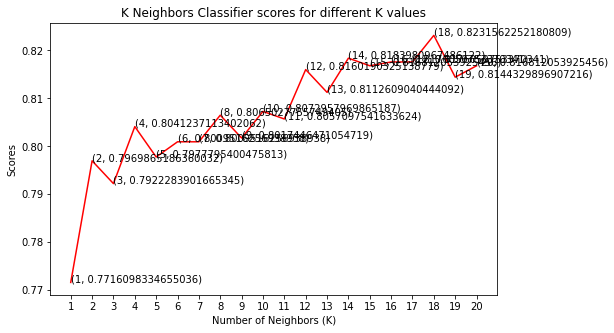

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
plt.figure(figsize=(8,5))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')#############we get k best value that is 8


#### applying no of neighbours = 14 in knn model with sigmoid function

In [50]:
#now again train our model
clf=KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
print(len(predict_y))

The log loss is: 0.39035188784753944
1261


In [51]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8293

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      3792
           1       0.71      0.53      0.61      1252

    accuracy                           0.83      5044
   macro avg       0.78      0.73      0.75      5044
weighted avg       0.82      0.83      0.82      5044


Confusion Matrix: 
 [[3515  277]
 [ 584  668]]

ROC AUC: 0.7302

Average Accuracy: 	 0.8071
Accuracy SD: 		 0.0103
Test Result:

accuracy score: 0.8200

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       941
           1       0.68      0.54      0.61       320

    accuracy                           0.82      1261
   macro avg       0.77      0.73      0.74      1261
weighted avg       0.81      0.82      0.81      1261


Confusion Matrix: 
 [[860  81]
 [146 174]]

ROC AUC: 0.7288



### SVM using min max scalar

In [52]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 42)
classifier.fit(X_train,y_train)

SVC(random_state=42)

In [53]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8293

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      3792
           1       0.71      0.53      0.61      1252

    accuracy                           0.83      5044
   macro avg       0.78      0.73      0.75      5044
weighted avg       0.82      0.83      0.82      5044


Confusion Matrix: 
 [[3515  277]
 [ 584  668]]

ROC AUC: 0.7302

Average Accuracy: 	 0.8071
Accuracy SD: 		 0.0103
Test Result:

accuracy score: 0.8200

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       941
           1       0.68      0.54      0.61       320

    accuracy                           0.82      1261
   macro avg       0.77      0.73      0.74      1261
weighted avg       0.81      0.82      0.81      1261


Confusion Matrix: 
 [[860  81]
 [146 174]]

ROC AUC: 0.7288



### Decision trees using min max classfier

In [54]:
dt_clf = DecisionTreeClassifier(max_features = 4, random_state = 42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_features=4, random_state=42)

In [55]:
print_score(dt_clf, X_train, X_test, y_train, y_test, train=True)
print_score(dt_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9905

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3792
           1       1.00      0.96      0.98      1252

    accuracy                           0.99      5044
   macro avg       0.99      0.98      0.99      5044
weighted avg       0.99      0.99      0.99      5044


Confusion Matrix: 
 [[3791    1]
 [  47 1205]]

ROC AUC: 0.9811

Average Accuracy: 	 0.7996
Accuracy SD: 		 0.0125
Test Result:

accuracy score: 0.8017

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       941
           1       0.61      0.60      0.60       320

    accuracy                           0.80      1261
   macro avg       0.74      0.73      0.74      1261
weighted avg       0.80      0.80      0.80      1261


Confusion Matrix: 
 [[820 121]
 [129 191]]

ROC AUC: 0.7341



### Random Forest with 100 trees

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
random_forest.fit(X_train, y_train) 
print_score(random_forest, X_train, X_test, y_train, y_test, train=True)
print_score(random_forest, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9905

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3792
           1       0.99      0.98      0.98      1252

    accuracy                           0.99      5044
   macro avg       0.99      0.99      0.99      5044
weighted avg       0.99      0.99      0.99      5044


Confusion Matrix: 
 [[3775   17]
 [  31 1221]]

ROC AUC: 0.9854

Average Accuracy: 	 0.8349
Accuracy SD: 		 0.0124
Test Result:

accuracy score: 0.8446

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       941
           1       0.71      0.66      0.68       320

    accuracy                           0.84      1261
   macro avg       0.80      0.78      0.79      1261
weighted avg       0.84      0.84      0.84      1261


Confusion Matrix: 
 [[853  88]
 [108 212]]

ROC AUC: 0.7845



### Bagging using min max scalar

In [57]:
# from sklearn.ensemble import BaggingClassifier
# bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
#                             bootstrap=True, oob_score=True,
#                             n_jobs=-1, random_state=42)
# bag_clf.fit(X_train, y_train)
# print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
# print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)


### Gradient Boost min max scalar

In [58]:
from xgboost import XGBClassifier
xg_boost = XGBClassifier()
xg_boost.fit(X_train, y_train)
print_score(xg_boost, X_train, X_test, y_train, y_test, train=True)
print_score(xg_boost, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9383

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3792
           1       0.90      0.84      0.87      1252

    accuracy                           0.94      5044
   macro avg       0.93      0.91      0.92      5044
weighted avg       0.94      0.94      0.94      5044


Confusion Matrix: 
 [[3681  111]
 [ 200 1052]]

ROC AUC: 0.9055

Average Accuracy: 	 0.8582
Accuracy SD: 		 0.0130
Test Result:

accuracy score: 0.8549

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       941
           1       0.74      0.65      0.70       320

    accuracy                           0.85      1261
   macro avg       0.82      0.79      0.80      1261
weighted avg       0.85      0.85      0.85      1261


Confusion Matrix: 
 [[869  72]
 [111 209]]

ROC AUC: 0.7883



In [59]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

### Adaboost

In [60]:
adaboost_clf = AdaBoostClassifier(n_estimators=200,random_state = 100)
adaboost_clf.fit(X_train, y_train)
print_score(adaboost_clf, X_train, X_test, y_train, y_test, train=True)
print_score(adaboost_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8721

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      3792
           1       0.79      0.65      0.72      1252

    accuracy                           0.87      5044
   macro avg       0.84      0.80      0.82      5044
weighted avg       0.87      0.87      0.87      5044


Confusion Matrix: 
 [[3581  211]
 [ 434  818]]

ROC AUC: 0.7989

Average Accuracy: 	 0.8624
Accuracy SD: 		 0.0120
Test Result:

accuracy score: 0.8517

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       941
           1       0.75      0.62      0.68       320

    accuracy                           0.85      1261
   macro avg       0.82      0.77      0.79      1261
weighted avg       0.85      0.85      0.85      1261


Confusion Matrix: 
 [[877  64]
 [123 197]]

ROC AUC: 0.7738



### Adaboost -> Random Forest min max scalar

In [61]:
adaboost_random = AdaBoostClassifier(n_estimators=100, base_estimator=random_forest,learning_rate=1, random_state = 1)
adaboost_random.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   learning_rate=1, n_estimators=100, random_state=1)

In [62]:
print_score(adaboost_random, X_train, X_test, y_train, y_test, train=True)
print_score(adaboost_random, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9905

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3792
           1       0.98      0.98      0.98      1252

    accuracy                           0.99      5044
   macro avg       0.99      0.99      0.99      5044
weighted avg       0.99      0.99      0.99      5044


Confusion Matrix: 
 [[3772   20]
 [  28 1224]]

ROC AUC: 0.9862

Average Accuracy: 	 0.8144
Accuracy SD: 		 0.0097
Test Result:

accuracy score: 0.8152

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       941
           1       0.65      0.58      0.61       320

    accuracy                           0.82      1261
   macro avg       0.76      0.74      0.75      1261
weighted avg       0.81      0.82      0.81      1261


Confusion Matrix: 
 [[843  98]
 [135 185]]

ROC AUC: 0.7370



### XGBoost classifier

In [63]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1,n_estimators=200,objective='binary:logistic',nthread= 4,n_jobs= 4,base_score= 0.6)
xgb_model.fit(X_train, y_train)
print_score(xgb_model, X_train, X_test, y_train, y_test, train=True)
print_score(xgb_model, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9167

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      3792
           1       0.87      0.78      0.82      1252

    accuracy                           0.92      5044
   macro avg       0.90      0.87      0.88      5044
weighted avg       0.92      0.92      0.92      5044


Confusion Matrix: 
 [[3646  146]
 [ 274  978]]

ROC AUC: 0.8713

Average Accuracy: 	 0.8588
Accuracy SD: 		 0.0129
Test Result:

accuracy score: 0.8541

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       941
           1       0.74      0.66      0.70       320

    accuracy                           0.85      1261
   macro avg       0.81      0.79      0.80      1261
weighted avg       0.85      0.85      0.85      1261


Confusion Matrix: 
 [[867  74]
 [110 210]]

ROC AUC: 0.7888



### Stacking -> Meta Classifier -  Logistic Regression and ensembles as "Decision Tree" and "Random Forest"

In [64]:
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(X_train, y_train, test_size=0.5, random_state=100)

In [65]:
def train_base_learners(base_learners, inp, out, verbose=True):
    """
    Train all base learners in the library.
    """
    if verbose: print("Fitting models.")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        m.fit(inp, out)
        if verbose: print("done")

In [66]:
train_base_learners({'DT': dt_clf,'RF': random_forest}, xtrain_base, ytrain_base)

Fitting models.
DT... done
RF... done


In [67]:
def predict_base_learners(pred_base_learners, inp, verbose=True):
    """
    Generate a prediction matrix.
    """
    P = np.zeros((inp.shape[0], len(pred_base_learners)))

    if verbose: print("Generating base learner predictions.")
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        p = m.predict_proba(inp)
        # With two classes, need only predictions for one class
        P[:, i] = p[:, 1]
        if verbose: print("done")

    return P

In [68]:
#base learners as Decision trees and Random Forest
P_base = predict_base_learners({'DT': dt_clf,'RF': random_forest}, xpred_base)

Generating base learner predictions.
DT... done
RF... done


In [69]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(P_base, ypred_base)

LogisticRegression()

In [70]:
def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    """
    Generate predictions from the ensemble.
    """
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    return P_pred, meta_learner.predict_proba(P_pred)[:, 1]

In [71]:
P_pred, p = ensemble_predict({'DT': dt_clf,'RF': random_forest}, logisticRegr, X_test)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(y_test, p))

Generating base learner predictions.
DT... done
RF... done

Ensemble ROC-AUC score: 0.880


### Stacking -> Single Classifier- Random Forest --> Adaboost --> Bagging

In [72]:
## it takes almost 2hrs to train the model

## Standard Scaling - Label Encoder

In [73]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [74]:
standard_scalar = pd.DataFrame(X, columns=X_col)
standard_scalar.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,native_country,workclass,education,marital_status,occupation,relationship,race,sex
0,0.038909,1.146582,0.147846,-0.22642,-0.091296,0.271373,2.946006,-0.353406,0.952813,-1.478075,-0.264582,0.387138,0.684595
1,0.874105,1.146582,-0.148406,-0.22642,-2.374825,0.271373,1.890633,-0.353406,-0.385157,-0.739545,-0.886577,0.387138,0.684595
2,-0.037018,-0.440770,-0.148406,-0.22642,-0.091296,0.271373,-0.220114,0.170636,-1.723128,-0.247192,-0.264582,0.387138,0.684595
3,1.101886,-1.234446,-0.148406,-0.22642,-0.091296,0.271373,-0.220114,-2.449573,-0.385157,-0.247192,-0.886577,-2.005909,0.684595
4,-0.796288,1.146582,-0.148406,-0.22642,-0.091296,-5.083888,-0.220114,-0.353406,-0.385157,0.737515,2.223398,-2.005909,-1.460718


In [75]:
X_train, X_test, y_train, y_test = train_test_split(standard_scalar, y, train_size=0.8,random_state=42)

### Naive Bayes with standard scaling

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [77]:
print_score(nb, X_train, X_test, y_train, y_test, train=True)
print_score(nb, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8011

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      3792
           1       0.70      0.35      0.47      1252

    accuracy                           0.80      5044
   macro avg       0.76      0.65      0.67      5044
weighted avg       0.79      0.80      0.78      5044


Confusion Matrix: 
 [[3601  191]
 [ 812  440]]

ROC AUC: 0.6505

Average Accuracy: 	 0.8019
Accuracy SD: 		 0.0138
Test Result:

accuracy score: 0.7994

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       941
           1       0.71      0.36      0.48       320

    accuracy                           0.80      1261
   macro avg       0.76      0.65      0.68      1261
weighted avg       0.79      0.80      0.77      1261


Confusion Matrix: 
 [[893  48]
 [205 115]]

ROC AUC: 0.6542



In [78]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

The log loss is: 0.3901405292098841
1261


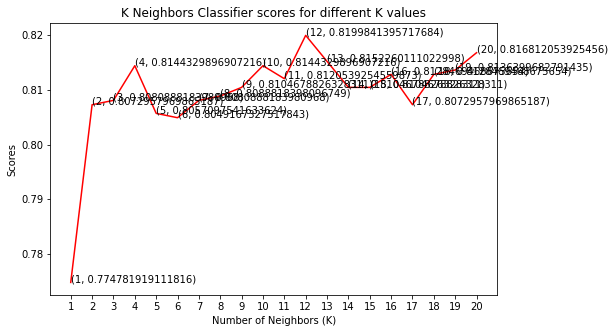

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
plt.figure(figsize=(8,5))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')#############we get k best value that is 8
#now again train our model
clf=KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))#########Plot confusion atrix
print(len(predict_y))
#print(len(y_test))

### Implementing KNN with standard scaling

In [80]:
#standard scaling
knn = KNeighborsClassifier(n_neighbors=12,
                           p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [81]:
print_score(knn, X_train, X_test, y_train, y_test, train=True)
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8454

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      3792
           1       0.76      0.56      0.64      1252

    accuracy                           0.85      5044
   macro avg       0.81      0.75      0.77      5044
weighted avg       0.84      0.85      0.84      5044


Confusion Matrix: 
 [[3567  225]
 [ 555  697]]

ROC AUC: 0.7487

Average Accuracy: 	 0.8142
Accuracy SD: 		 0.0061
Test Result:

accuracy score: 0.8200

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       941
           1       0.69      0.52      0.59       320

    accuracy                           0.82      1261
   macro avg       0.77      0.72      0.74      1261
weighted avg       0.81      0.82      0.81      1261


Confusion Matrix: 
 [[868  73]
 [154 166]]

ROC AUC: 0.7206



### Implementing SVM with standard scaling

In [82]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', random_state = 42)
classifier_svm.fit(X_train,y_train)

SVC(random_state=42)

In [83]:
y_pred = classifier.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[941,   0],
       [317,   3]], dtype=int64)

In [85]:
print_score(classifier_svm, X_train, X_test, y_train, y_test, train=True)
print_score(classifier_svm, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8519

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      3792
           1       0.80      0.54      0.64      1252

    accuracy                           0.85      5044
   macro avg       0.83      0.75      0.78      5044
weighted avg       0.85      0.85      0.84      5044


Confusion Matrix: 
 [[3621  171]
 [ 576  676]]

ROC AUC: 0.7474

Average Accuracy: 	 0.8335
Accuracy SD: 		 0.0177
Test Result:

accuracy score: 0.8430

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       941
           1       0.79      0.52      0.63       320

    accuracy                           0.84      1261
   macro avg       0.82      0.74      0.76      1261
weighted avg       0.84      0.84      0.83      1261


Confusion Matrix: 
 [[896  45]
 [153 167]]

ROC AUC: 0.7370



In [86]:
import matplotlib as mpl
from matplotlib import cm

In [87]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

The log loss is: 0.3728700740776604
1261


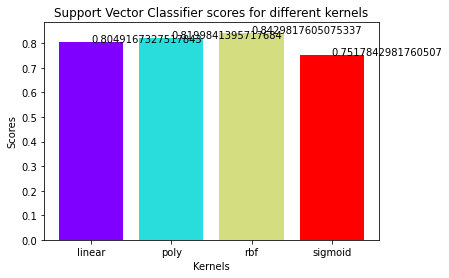

In [88]:
colors = cm.rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
##################### with best kernel 
clf=SVC(kernel ='rbf')
#clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))#########Plot confusion atrix
print(len(predict_y))
#print(len(y_test))

### Decision trees with standard scaling

In [89]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

#### Gini index and entropy

In [90]:
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth =3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
#Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

In [91]:
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
print("Results Using Gini Index:") 
    
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 
      
print("Results Using Entropy:") 

y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 

Results Using Gini Index:
Predicted values:
[0 0 0 ... 0 0 1]
Confusion Matrix:  [[889  52]
 [163 157]]
Accuracy :  82.95003965107058
Report :                precision    recall  f1-score   support

           0       0.85      0.94      0.89       941
           1       0.75      0.49      0.59       320

    accuracy                           0.83      1261
   macro avg       0.80      0.72      0.74      1261
weighted avg       0.82      0.83      0.82      1261

Results Using Entropy:
Predicted values:
[0 0 0 ... 1 0 1]
Confusion Matrix:  [[884  57]
 [151 169]]
Accuracy :  83.50515463917526
Report :                precision    recall  f1-score   support

           0       0.85      0.94      0.89       941
           1       0.75      0.53      0.62       320

    accuracy                           0.84      1261
   macro avg       0.80      0.73      0.76      1261
weighted avg       0.83      0.84      0.82      1261



### gini index 82.95% and entropy 83.50%

In [92]:
dt_scores = []
for i in range(1, len(X_col) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

The log loss is: 0.41994397755931645
1261


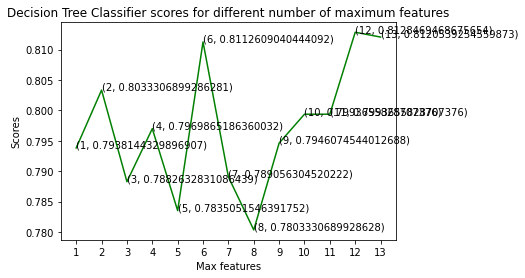

In [93]:
plt.plot([i for i in range(1, len(X_col) + 1)], dt_scores, color = 'green')
for i in range(1, len(X_col) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X_col) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
clf=DecisionTreeClassifier(max_features = 10, random_state = 42)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))#########Plot confusion atrix
print(len(predict_y))
#print(len(y_test))

In [94]:
dt_clf = DecisionTreeClassifier(max_features = 12, random_state = 42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_features=12, random_state=42)

In [95]:
dt_clf = CalibratedClassifierCV(dt_clf, method="sigmoid")
dt_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(max_features=12,
                                                             random_state=42))

In [96]:
print_score(dt_clf, X_train, X_test, y_train, y_test, train=True)
print_score(dt_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9048

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      3792
           1       1.00      0.62      0.76      1252

    accuracy                           0.90      5044
   macro avg       0.94      0.81      0.85      5044
weighted avg       0.92      0.90      0.90      5044


Confusion Matrix: 
 [[3792    0]
 [ 480  772]]

ROC AUC: 0.8083

Average Accuracy: 	 0.8261
Accuracy SD: 		 0.0073
Test Result:

accuracy score: 0.8200

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       941
           1       0.80      0.38      0.52       320

    accuracy                           0.82      1261
   macro avg       0.81      0.68      0.70      1261
weighted avg       0.82      0.82      0.80      1261


Confusion Matrix: 
 [[911  30]
 [197 123]]

ROC AUC: 0.6762



### random forest (ensemble) with standard scaling

In [97]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
random_forest.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [98]:
print_score(random_forest, X_train, X_test, y_train, y_test, train=True)
print_score(random_forest, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9905

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3792
           1       0.98      0.98      0.98      1252

    accuracy                           0.99      5044
   macro avg       0.99      0.99      0.99      5044
weighted avg       0.99      0.99      0.99      5044


Confusion Matrix: 
 [[3773   19]
 [  29 1223]]

ROC AUC: 0.9859

Average Accuracy: 	 0.8366
Accuracy SD: 		 0.0107
Test Result:

accuracy score: 0.8454

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       941
           1       0.71      0.66      0.68       320

    accuracy                           0.85      1261
   macro avg       0.80      0.79      0.79      1261
weighted avg       0.84      0.85      0.84      1261


Confusion Matrix: 
 [[854  87]
 [108 212]]

ROC AUC: 0.7850



In [99]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The log loss is: 0.35268154942003965
1261


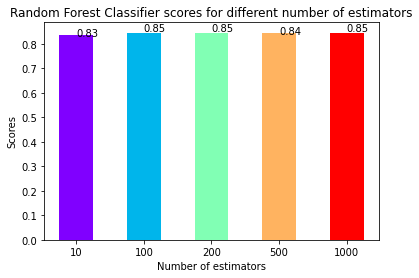

In [100]:
colors = cm.rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.5)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i].round(2), rf_scores[i].round(2))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
clf=RandomForestClassifier(n_estimators = 200, random_state = 0)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))#########Plot confusion atrix
print(len(predict_y))
#print(len(y_test))

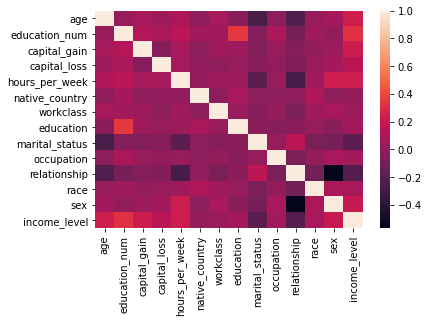

In [101]:
#correlation analysis
corr = df_model.corr()
ax = sns.heatmap(corr)

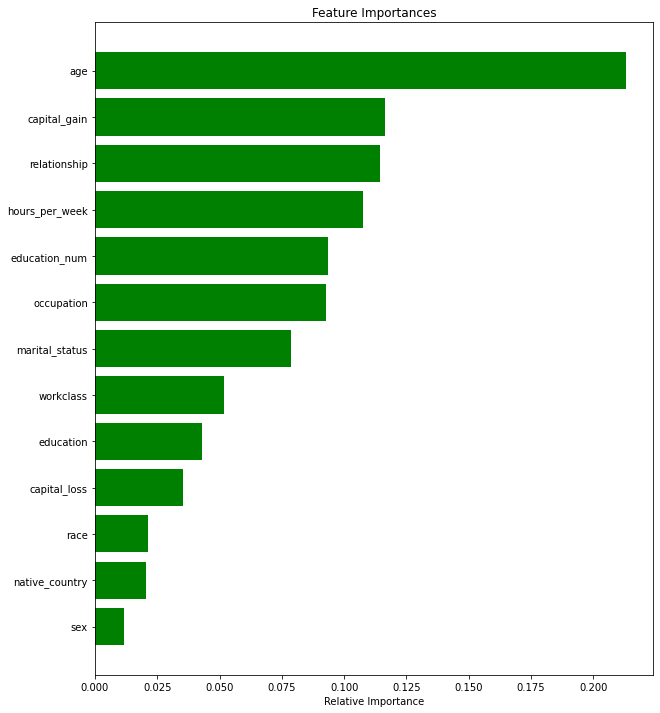

In [102]:
clf=RandomForestClassifier(n_estimators = 500, random_state = 0)
clf.fit(X_train,y_train)
features = X_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###  Logistic Regression SGDClassifier with standard scaling

For values of alpha =  1e-05 The log loss is: 0.43102254433614107
For values of alpha =  0.0001 The log loss is: 0.4143555098928638
For values of alpha =  0.001 The log loss is: 0.41230885113270427
For values of alpha =  0.01 The log loss is: 0.41626718525054635
For values of alpha =  0.1 The log loss is: 0.42960364091240244
For values of alpha =  1 The log loss is: 0.4375037532717216
For values of alpha =  10 The log loss is: 0.4404831148454785


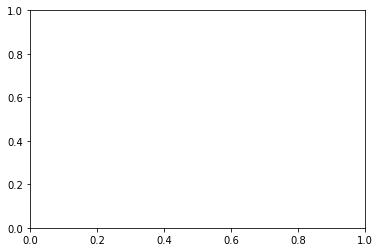

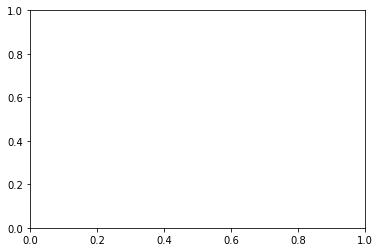

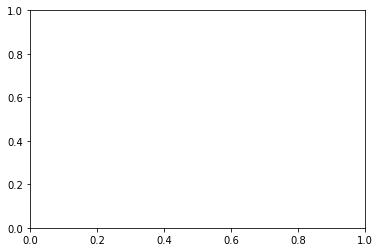

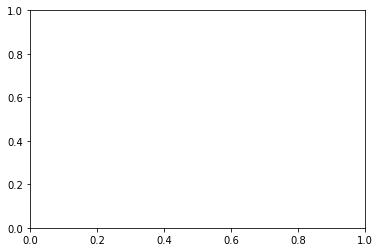

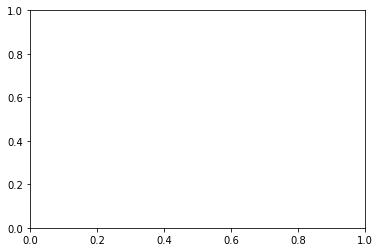

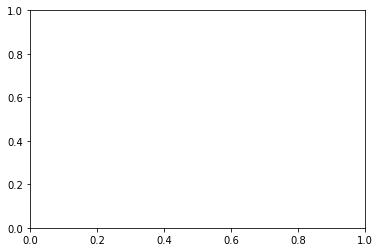

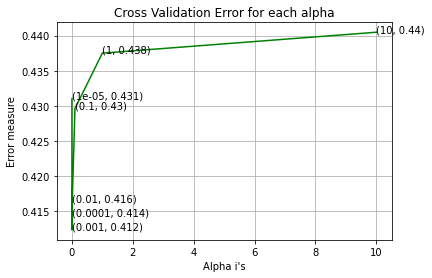

For values of best alpha =  0.001 The train log loss is: 0.40360654801745827
For values of best alpha =  0.001 The test log loss is: 0.41230885113270427
Total number of data points : 1261


In [103]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

### Bagging with standard scaling

In [104]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SGDClassifier(alpha=0.001, loss='log',
                                               random_state=42),
                  n_estimators=1000, n_jobs=-1, oob_score=True,
                  random_state=42)

In [105]:
bag_clf.oob_score_
#OOB score is computed as the number of correctly predicted rows from the out of bag sample.

0.8110626486915147

In [106]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8125

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      3792
           1       0.70      0.42      0.53      1252

    accuracy                           0.81      5044
   macro avg       0.77      0.68      0.71      5044
weighted avg       0.80      0.81      0.79      5044


Confusion Matrix: 
 [[3570  222]
 [ 724  528]]

ROC AUC: 0.6816

Average Accuracy: 	 0.8101
Accuracy SD: 		 0.0164
Test Result:

accuracy score: 0.8097

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       941
           1       0.71      0.42      0.53       320

    accuracy                           0.81      1261
   macro avg       0.77      0.68      0.71      1261
weighted avg       0.80      0.81      0.79      1261


Confusion Matrix: 
 [[885  56]
 [184 136]]

ROC AUC: 0.6827



### Gradient boosting with standard scaling

In [107]:
gradient_boost= GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [108]:
print_score(gradient_boost, X_train, X_test, y_train, y_test, train=True)
print_score(gradient_boost, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8751

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      3792
           1       0.83      0.62      0.71      1252

    accuracy                           0.88      5044
   macro avg       0.86      0.79      0.82      5044
weighted avg       0.87      0.88      0.87      5044


Confusion Matrix: 
 [[3636  156]
 [ 474  778]]

ROC AUC: 0.7901

Average Accuracy: 	 0.8584
Accuracy SD: 		 0.0167
Test Result:

accuracy score: 0.8525

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       941
           1       0.76      0.61      0.68       320

    accuracy                           0.85      1261
   macro avg       0.82      0.77      0.79      1261
weighted avg       0.85      0.85      0.85      1261


Confusion Matrix: 
 [[881  60]
 [126 194]]

ROC AUC: 0.7712



### XG boost with standard scaling

In [109]:
from xgboost import XGBClassifier
xg_boost = XGBClassifier()
xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
y_pred = xg_boost.predict(X_test)
predictions = [round(value) for value in y_pred]

In [111]:
print_score(xg_boost, X_train, X_test, y_train, y_test, train=True)
print_score(xg_boost, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9383

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3792
           1       0.90      0.84      0.87      1252

    accuracy                           0.94      5044
   macro avg       0.93      0.91      0.92      5044
weighted avg       0.94      0.94      0.94      5044


Confusion Matrix: 
 [[3681  111]
 [ 200 1052]]

ROC AUC: 0.9055

Average Accuracy: 	 0.8584
Accuracy SD: 		 0.0128
Test Result:

accuracy score: 0.8541

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       941
           1       0.74      0.65      0.69       320

    accuracy                           0.85      1261
   macro avg       0.81      0.79      0.80      1261
weighted avg       0.85      0.85      0.85      1261


Confusion Matrix: 
 [[868  73]
 [111 209]]

ROC AUC: 0.7878



### adaboost -> random forest with standard scaling

In [112]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
adaboost_random = AdaBoostClassifier(n_estimators=100, base_estimator=random_forest,learning_rate=1, random_state = 1)
adaboost_random.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   learning_rate=1, n_estimators=100, random_state=1)

In [ ]:
#print_score(adaboost_random, X_train, X_test, y_train, y_test, train=True)
#print_score(adaboost_random, X_train, X_test, y_train, y_test, train=False)

In [ ]:
#found that adaboost+random takes much much more time than bagging
#baggin approx more than 40 min 
#adaboost+random more than 2hrs

### random forest -> adaboost -> bagging with standard scaling

In [ ]:
#takes almost more than 2hrs to train

In [ ]:
# from sklearn import model_selection 
# seed = 8
# # no. of base classifier 
# num_trees = 500
# kfold = model_selection.KFold(n_splits = 3, 
#                        random_state = seed) 
  
# # bagging classifier 
# model = BaggingClassifier(base_estimator = adaboost_random, 
#                           n_estimators = num_trees, 
#                           random_state = seed) 
  
# results = model_selection.cross_val_score(model, X, y, cv = kfold) 
# print("accuracy :") 
# print(results.mean()) 

In [ ]:
#t = sns.lmplot(x="hr", y="cnt", data=df)

### Stacking
#### Meta Classifier- as Logistic Regression and ensembles as "Decision Tree", "SVM" and "Random Forest" 

In [114]:
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(X_train, y_train, test_size=0.5, random_state=100)

In [115]:
def train_base_learners(base_learners, inp, out, verbose=True):
    """
    Train all base learners in the library.
    """
    if verbose: print("Fitting models.")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        m.fit(inp, out)
        if verbose: print("done")
        

In [116]:
train_base_learners({'DT': dt_clf,'RF': random_forest,'SVM':classifier_svm}, xtrain_base, ytrain_base)

Fitting models.
DT... done
RF... done
SVM... done


In [117]:
def predict_base_learners(pred_base_learners, inp, verbose=True):
    """
    Generate a prediction matrix.
    """
    P = np.zeros((inp.shape[0], len(pred_base_learners)))

    if verbose: print("Generating base learner predictions.")
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        p = m.predict_proba(inp)
        # With two classes, need only predictions for one class
        P[:, i] = p[:, 1]
        if verbose: print("done")

    return P

In [118]:
P_base = predict_base_learners({'DT': dt_clf,'RF': random_forest}, xpred_base)
logisticRegr = LogisticRegression()
logisticRegr.fit(P_base, ypred_base)

Generating base learner predictions.
DT... done
RF... done


LogisticRegression()

In [119]:
def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    """
    Generate predictions from the ensemble.
    """
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    return P_pred, meta_learner.predict_proba(P_pred)[:, 1]

In [120]:
P_pred, p = ensemble_predict({'DT': dt_clf,'RF': random_forest}, logisticRegr, X_test)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(y_test, p))

Generating base learner predictions.
DT... done
RF... done

Ensemble ROC-AUC score: 0.881


#### Stacking -> Decision trees, Random forest & Xg boost

In [121]:
from sklearn.ensemble import StackingClassifier
sclf = StackingClassifier(estimators=[('DT',dt_clf ),('RFC',random_forest),('XG', xg_boost)])
sclf.fit(X_train, y_train)
print_score(sclf, X_train, X_test, y_train, y_test, train=True)
print_score(sclf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9463

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      3792
           1       0.94      0.84      0.89      1252

    accuracy                           0.95      5044
   macro avg       0.94      0.91      0.93      5044
weighted avg       0.95      0.95      0.95      5044


Confusion Matrix: 
 [[3720   72]
 [ 199 1053]]

ROC AUC: 0.9110

Average Accuracy: 	 0.8567
Accuracy SD: 		 0.0110
Test Result:

accuracy score: 0.8573

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       941
           1       0.76      0.64      0.69       320

    accuracy                           0.86      1261
   macro avg       0.82      0.79      0.80      1261
weighted avg       0.85      0.86      0.85      1261


Confusion Matrix: 
 [[876  65]
 [115 205]]

ROC AUC: 0.7858



#### Stacking -> Decision trees, Random forest, SVM & Xg boost

In [122]:
from sklearn.ensemble import StackingClassifier
sclf = StackingClassifier(estimators=[('DT',dt_clf ),('RFC',random_forest),('XG', xg_boost),('SVM', classifier_svm)])
sclf.fit(X_train, y_train)
print_score(sclf, X_train, X_test, y_train, y_test, train=True)
print_score(sclf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9264

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3792
           1       0.91      0.78      0.84      1252

    accuracy                           0.93      5044
   macro avg       0.92      0.88      0.90      5044
weighted avg       0.93      0.93      0.92      5044


Confusion Matrix: 
 [[3692  100]
 [ 271  981]]

ROC AUC: 0.8786

Average Accuracy: 	 0.8577
Accuracy SD: 		 0.0159
Test Result:

accuracy score: 0.8588

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       941
           1       0.77      0.63      0.69       320

    accuracy                           0.86      1261
   macro avg       0.83      0.78      0.80      1261
weighted avg       0.85      0.86      0.85      1261


Confusion Matrix: 
 [[882  59]
 [119 201]]

ROC AUC: 0.7827



### Implementing PCA

In [123]:
X = df_model.drop(['income_level'], axis=1)
X_col = X.columns
y = df_model['income_level']

In [124]:
X = StandardScaler().fit_transform(X)

In [125]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=7)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.820 (0.033)


In [126]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=2)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.794 (0.040)


In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-4.385623,-0.429046
1,9.410961,2.914930
2,-3.595490,-1.820090
3,-0.346018,-4.690560
4,1.210653,2.078321


In [129]:
finalDf = pd.concat([principalDf, df_model[['income_level']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,income_level
0,-4.385623,-0.429046,0.0
1,9.410961,2.914930,0.0
2,-3.595490,-1.820090,0.0
3,-0.346018,-4.690560,0.0
4,1.210653,2.078321,0.0


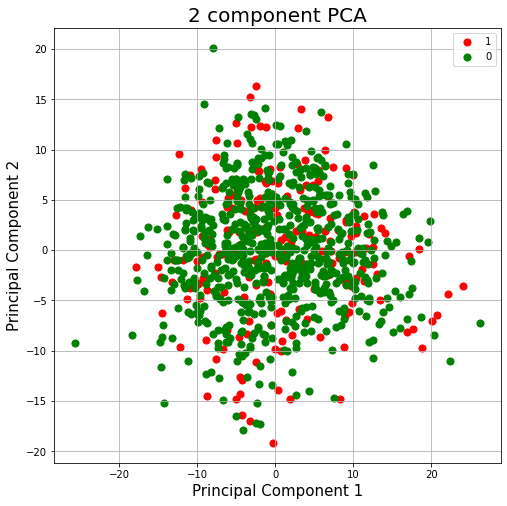

In [130]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['income_level'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Singular Value Decomposition

In [135]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)
